In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [77]:
final_df = pd.read_csv('../../Data/final_csv_all_data.csv')
final_df.head()

,Entity,Code,Year,kg_per_yr_per_capita,Production_in_tons,Population (historical estimates),Life_Expectancy_years,continent
0,Afghanistan,AFG,1961,0.030559,300.0,8790140,32.96,Asia
1,Afghanistan,AFG,1962,0.030578,300.0,8969055,33.47,Asia
2,Afghanistan,AFG,1963,0.030598,300.0,9157463,33.97,Asia
3,Afghanistan,AFG,1964,0.030614,300.0,9355510,34.46,Asia
4,Afghanistan,AFG,1965,0.030627,300.0,9565154,34.95,Asia


In [78]:
import numpy as np
final_df['log_production'] = np.log10(final_df['Production_in_tons'])

c:\Users\JesseNoss\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [79]:
protein_all = pd.read_csv('Data/all_protein_consumption_sources.csv')
protein_animal = pd.read_csv('Data/animal_protein_consumption.csv')

coastal_pop = pd.read_csv('Data/pop_within_10km_coast.csv')
protected_areas = pd.read_csv('Data/marine-protected-areas.csv')

In [81]:
col_to_merge = ['Entity', 'Code', 'Year', 'fish_and_seafood_kg_protein_per_capita', 'percent_fish_total_protein_per_capita']
compiled_df = final_df.merge(protein_all[col_to_merge], on=['Entity', 'Code', 'Year'])

col_to_merge = ['Entity', 'Code', 'Year', 'percent_fish_protein_all_animal']
compiled_df = compiled_df.merge(protein_animal[col_to_merge], on=['Entity', 'Code', 'Year'])


In [82]:
compiled_df = compiled_df.rename(columns={'percent_fish_total_protein_per_capita': r'% fish protein from all sources', 'percent_fish_protein_all_animal': r'% fish protein from animal sources'})

# new_compile.head()
compiled_df.to_csv('./Data/final_csv.csv')

In [108]:
col_to_merge = ['Entity', 'Code', 'Year', 'fish_and_seafood_kg_protein_per_capita', 'milk_kg_protein_per_capita', 'all_egg_kg_protein_per_capita', 'total_meat_kg_protein_per_capita', 'veg_kg_protein_per_capita']

all_protein = final_df.merge(protein_all[col_to_merge], on=['Entity', 'Year'])
all_protein = all_protein.rename(columns={'Code_x': 'Code', 'fish_and_seafood_kg_protein_per_capita': 'fish kg protein per cap', 'milk_kg_protein_per_capita': 'milk kg protein per cap', 'all_egg_kg_protein_per_capita': 'egg kg protein per cap', 'total_meat_kg_protein_per_capita': 'meat kg protein per cap', 'veg_kg_protein_per_capita': 'veg kg protein per cap'})
all_protein = all_protein.drop(columns='Code_y')
all_protein['sum_proteins'] = (all_protein['fish kg protein per cap'] + all_protein['milk kg protein per cap'] + all_protein['veg kg protein per cap'] + all_protein['egg kg protein per cap'] + all_protein['meat kg protein per cap'])
all_protein.to_csv('./Data/compiled_protein_sources.csv')

sub_protein = all_protein[['Entity', 'fish kg protein per cap', 'milk kg protein per cap', 'egg kg protein per cap', 'meat kg protein per cap', 'veg kg protein per cap']].loc[all_protein['Year'] == 2020]

## Visualizations

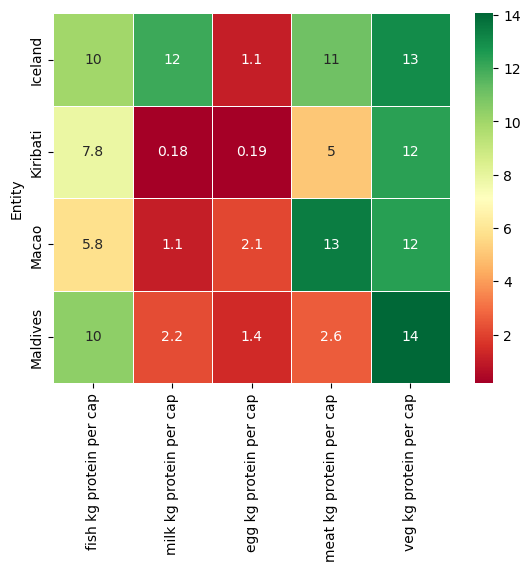

In [100]:
import seaborn as sns
selection = ['Macao', 'Maldives', 'Kiribati', 'Iceland']
sns.heatmap(sub_protein.loc[sub_protein['Entity'].isin(selection)].set_index('Entity'), annot=True, cmap='RdYlGn', linewidths=0.5);

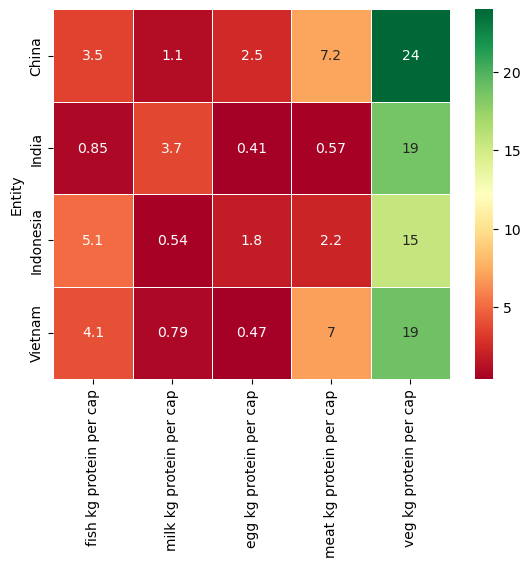

In [101]:
import seaborn as sns
selection = ['China', 'India', 'Indonesia', 'Vietnam']
sns.heatmap(sub_protein.loc[sub_protein['Entity'].isin(selection)].set_index('Entity'), annot=True, cmap='RdYlGn', linewidths=0.5);

In [37]:
year = int(input('Select what year you want to explore: '))
year_select = compiled_df.loc[compiled_df['Year']==year]

In [ ]:
import seaborn as sns

first = int(input('Select first number for display range: '))
subset_test = year_select[['Entity', r'% fish protein from all sources', r'% fish protein from animal sources']].set_index('Entity')[first: (first+4)]

sns.heatmap(subset_test, annot=True, cmap='RdYlGn', linewidths=0.5)

In [28]:
countries = list(year_select['Entity'])

'Barbados'

In [40]:
import random

def country_selections(text):
    
    if text == 1:
        first = 0
        subset_test = year_select[['Entity', r'% fish protein from all sources', r'% fish protein from animal sources']].set_index('Entity')[first: (first+4)]
        the_map = sns.heatmap(subset_test, annot=True, cmap='RdYlGn', linewidths=0.5)
    elif text == 2:
        first = -5
        subset_test = year_select[['Entity', r'% fish protein from all sources', r'% fish protein from animal sources']].set_index('Entity')[first: (first+4)]
        the_map = sns.heatmap(subset_test, annot=True, cmap='RdYlGn', linewidths=0.5)
    elif text == 3:
        selecting_countries = True
        selection = []
        i=0
        while selecting_countries:
            country = input('Country {i}: ')
            if country in countries:
                selection.append(country)
                i += 1
            elif country == '-':
                selection.append(countries[random.randint(0, len(countries))])
                i += 1
            else:
                print('Please select a valid country! It is either spelled wrong or not in our database.')

            if i >= 4:
                selecting_countries = False

        subset_ = year_select[['Entity', r'% fish protein from all sources', r'% fish protein from animal sources']]
        subset_test = subset_.loc[subset_['Entity'].isin(selection)].set_index('Entity')
        the_map = sns.heatmap(subset_test, annot=True, cmap='RdYlGn', linewidths=0.5)
    else:
        print('Error!')
        print('Please input a number from 1 to 3')
    return the_map

Text(0.5, 1.0, '% of Protein from Fish in Top 5 Fish Producing Countries')

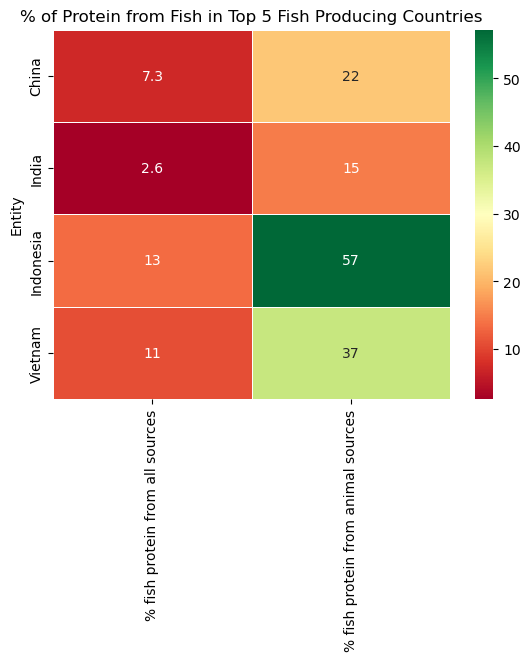

In [50]:
country_selections(int(input('Would you like to view the (1) first 4 countries, (2) last 4 countries, or (3) select 4 to compare? Input 1, 2, or 3: ')))
plt.title(r"% of Protein from Fish in Top 5 Fish Producing Countries")

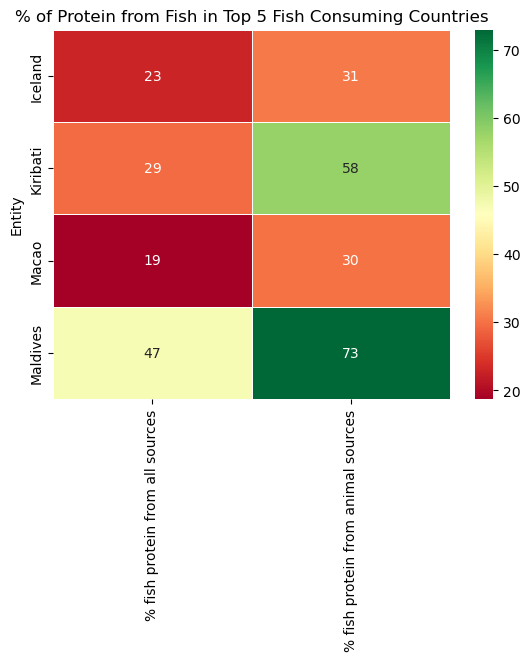

In [51]:
country_selections(int(input('Would you like to view the (1) first 4 countries, (2) last 4 countries, or (3) select 4 to compare? Input 1, 2, or 3: ')));
plt.title(r"% of Protein from Fish in Top 5 Fish Consuming Countries");

In [53]:
subset_ = year_select[['Entity', r'% fish protein from all sources', r'% fish protein from animal sources']]

selection = ['China', 'India', 'Indonesia', 'Vietnam']
subset_test = subset_.loc[subset_['Entity'].isin(selection)].set_index('Entity')
subset_test.style.background_gradient(cmap='Greens')

,% fish protein from all sources,% fish protein from animal sources
Entity,,
China,7.252138,21.787911
India,2.606767,14.889123
Indonesia,13.404213,57.212316
Vietnam,10.880830,37.263882


In [46]:
subset_ = year_select[['Entity', r'% fish protein from all sources', r'% fish protein from animal sources']]

selection = ['Maldives', 'Macao', 'Kiribati', 'Iceland']
subset_test = subset_.loc[subset_['Entity'].isin(selection)].set_index('Entity')
subset_test.style.background_gradient(cmap='Greens')

,% fish protein from all sources,% fish protein from animal sources
Entity,,
Iceland,22.754348,30.618788
Kiribati,29.363966,57.964600
Macao,18.689351,30.117790
Maldives,47.107154,73.023173
